<a href="https://colab.research.google.com/github/Shayankr/Machine_Learning/blob/master/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><center> Statistics, Outliers </center></b>

**Statistics** :- Statistics is a part of integrated applied mathematics which deals with data.

**Polpulation**: - is used to refer the total set of observations.

**Sample** -- is basically a small part or portion of the large population.

**Statistics Anlaysis**
* **Descriptive**-- helps to describe the data in mathematical and graphical way.
* **Inferential Statistics** -- split the data into samples and applies probability to arrive the conclusion.

**Outlier** --  are referred to as the unusual value(s) which can distort nad violate statistical analysis.
* Outliers are basically experimental errors in the data
* Some outliers are good for the datatset to detect anomaly like: detect fraud detection.
* It effects the mean and std. dev.


**IQR** -- divides the dataset into quartiles to measure the variability and the spread of the dataset.
* Splits the data into*** 4 equal part in sorted manner.***
* **Q1** - ***first*** quartile --> **25th percentile** of the datatset
* **Q2** - ***second*** quartile --> **50th percentile** of the dataset
* **Q3** - ***third*** quartile --> **75th percentile** of the datatset
* **Q4** -

* **IQR = (Q3-Q1)**

Lower and Upper limits in the Inter-quartile are basically the ranges where the adta points are lying.

* **Lower limit** = Q1-1.5*IQR
* **Upper limit** = Q3+1.5*IQR

<img src="https://pbs.twimg.com/media/EDANCjJXkAAOSjO.jpg"/>

**Cause of Outliers**:
* **Data Entry Errors**:- Human errors -- caused during data collection, recording
* **Measurement Error**:-  most common source of outliers. -- caused when the measurement instrument used turns out to be faulty.
* **Natural Outlier:**- When an outlier is not artificial (due to error) -- Most of real world data belong to this category.

Outlier can be of two types: 
* Univariate and 
* Multivariate. 

  <b>**DIFFERENT OUTLIER DETECTION TECHNIQUE.**
  1. Hypothesis Testing
  2. Z-score method
  3. Robust Z-score
  4. I.Q.R method
  5. Winsorization method(Percentile Capping)
  6. DBSCAN Clustering
  7. Isolation Forest
  8. Visualizing the data 

  * https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

**HOw to handle outliers in the datatset**

<b><center>Kaggle -- Pima Indians Diabetes Database</center>

<center>https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

About Dataset:
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content:
* The datasets consists of several medical predictor variables and *one target variable*, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Inspiration

# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading datatset
data = pd.read_csv("/content/diabetes_1.csv")

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# check datatype sof all variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# check discriptive statistics
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### **Missing Values Detection and Treatment:**

1. Blank values
2. Nan
3. null
4. some continuous columns might have 0's to indicate missing data.

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.notna().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [11]:
data.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

NO NULL values are present in this dataset.

In [12]:
# Since all the predictors columns are continuous in nature, there miht be 
# a chance that 0's in these columns indicate missing values.

# as if min value of "blood-pressure" is 0 ----- It means that the 0's represent NULL Values.
#       Because, blood-pressure can't be zero.
#       Similar case might be happen with "glucose" variable--- it also can't be zero.


# Let's check these stuffs:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

From the  above discription of data:

* It is clear that -- Pregnancies, Glucose, Blood-Pressure, Skin thickness, Insulin and BMI can't have minimum value as 0.
* So, these represent the "missing values".

In [13]:
# Replacing the 0's with "NaN"

from numpy import nan

data['Glucose'] = data['Glucose'].replace(0,np.nan)

In [14]:
data['Glucose'].isna().sum()

5

In [15]:
data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)

In [16]:
data['BloodPressure'].isna().sum()

35

In [17]:
data.shape

(768, 9)

In [18]:
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)

In [20]:
data['Insulin']= data['Insulin'].replace(0,np.nan)

In [21]:
data['BMI'] = data["BMI"].replace(0, np.nan)

In [22]:
# check few rows
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [24]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [26]:
# Imputing missing values with their respective column median

data.fillna(data.median(), inplace=True)

In [27]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [28]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [29]:
# checking if the missing vaues have been imputed

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## <b>Outlier Detection and Treatment

In [32]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

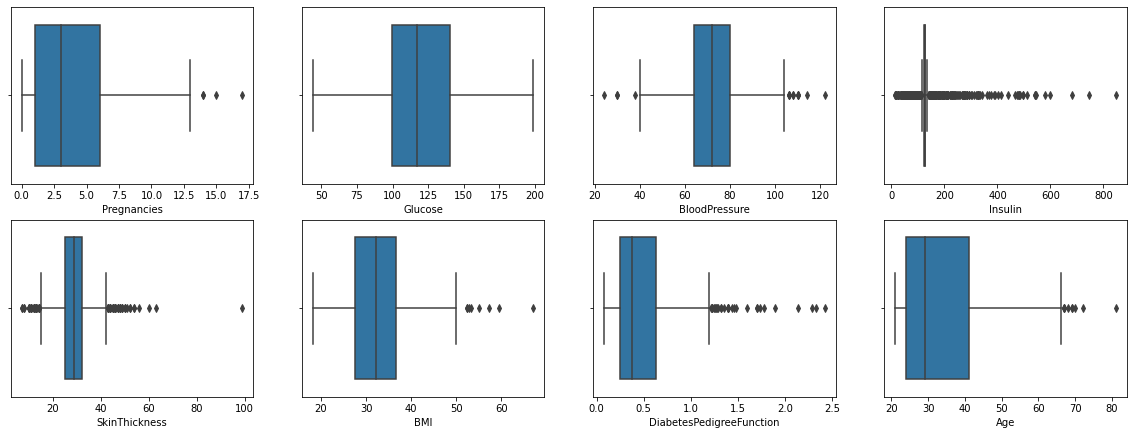

In [34]:
# Outlier detection using boxplot

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,5)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

plt.show()

Apart from "Glucose" all the other attributes show presence of outliers.

These lower and upper level oouliers will be replaced by the 5th and 95th percentile reapectively.

#### **numpy.clip()** function is used to **clip(limit) the values** in an array

In [36]:
# a: Array conatnining elelments to clip
# a-min : Minimumvalue
# a_max: maximum values

# If None Clippin is not perfrmed on lower level/

In [37]:
data['Pregnancies'] = data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05), upper = data["Pregnancies"].quantile(0.95))

In [38]:
data['BloodPressure'] = data["BloodPressure"].clip(lower=data['BloodPressure'].quantile(0.05), upper = data['BloodPressure'].quantile(0.95))

In [39]:
data['SkinThickness'] = data['SkinThickness'].clip(lower = data['SkinThickness'].quantile(0.05), upper = data['SkinThickness'].quantile(0.95))

In [40]:
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper = data['Insulin'].quantile(0.95))

In [42]:
data['BMI'] = data["BMI"].clip(upper = data['BMI'].quantile(0.95), lower = data['BMI'].quantile(0.05))

In [43]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].clip(lower = data['DiabetesPedigreeFunction'].quantile(0.05), upper = data['DiabetesPedigreeFunction'].quantile(0.95))

In [44]:
data["Age"] = data["Age"].clip(lower = data["Age"].quantile(0.05), upper = data['Age'].quantile(0.95))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

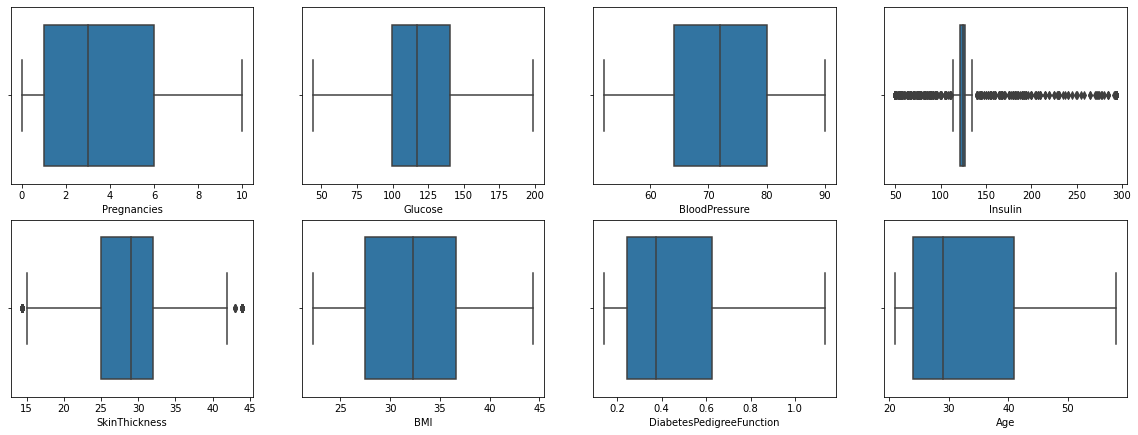

In [45]:
# plot

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,5)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

plt.show()

In [47]:
data["SkinThickness"] = data["SkinThickness"].clip(lower = data["SkinThickness"].quantile(0.07), upper = data["SkinThickness"].quantile(0.93))

In [48]:
data["Insulin"] = data["Insulin"].clip(lower = data["Insulin"].quantile(0.20), upper = data["Insulin"].quantile(0.80))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


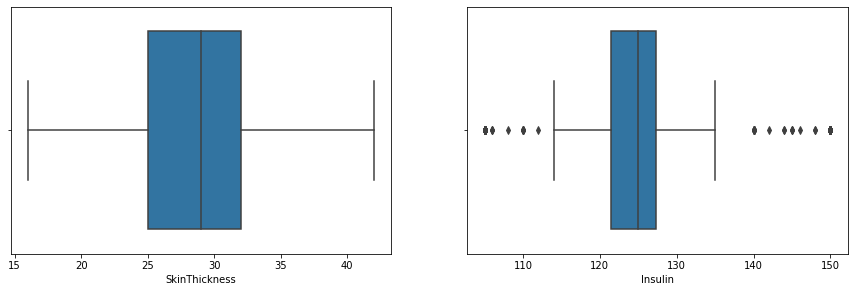

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data["SkinThickness"])

plt.subplot(2,2,2)
sns.boxplot(data["Insulin"])

The outliers of "SkinThickness" were treated by minor changes in the percentages in the upper and lower level...........while "Insulin" require lots of changes.

## Data Visulaization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


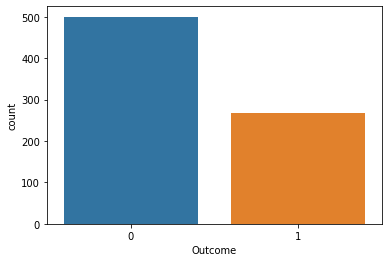

In [51]:
# understanding the distributiojn of "diabetic" vs. "Non-diabetic" patients

sns.countplot(data["Outcome"])

In [53]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From the above plot,--- it is clear that majority of tha data consists of NOn-Diabetic person(patients)

Now, understand the percentage of Diabetic vs Non-diabetic in the dataset.

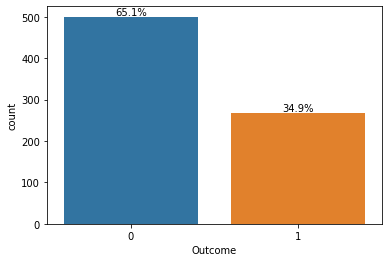

In [56]:
total = float(len(data))

ax = sns.countplot(x="Outcome", data=data)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height+3,
          "{0:.1%}".format(height/total),
          ha="center")

About 65% of the adta containd records belonging to "NOn-Diabetic" patients.

<ipython-input-59-d718348a0732>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),


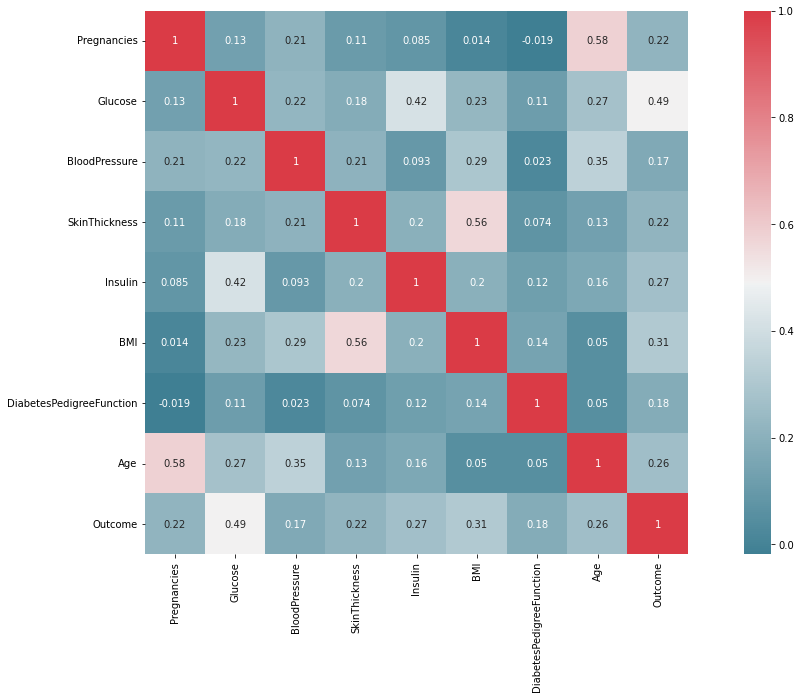

In [59]:
# Let's plot a coorelatioj plot.

f, ax = plt.subplots(figsize=(20,10))

corr = data.corr("pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax, annot=True)

From the above corr-plot, it is clearly inferred taht---- there is no high multi-colinearity in the dataset.

* Glucose, Age, BMI, and Pregnancies are the most correlated parameters with the outcome

* There is a little correlation between Age and Pregnancies

**Pariplot**

creates a grid of axes

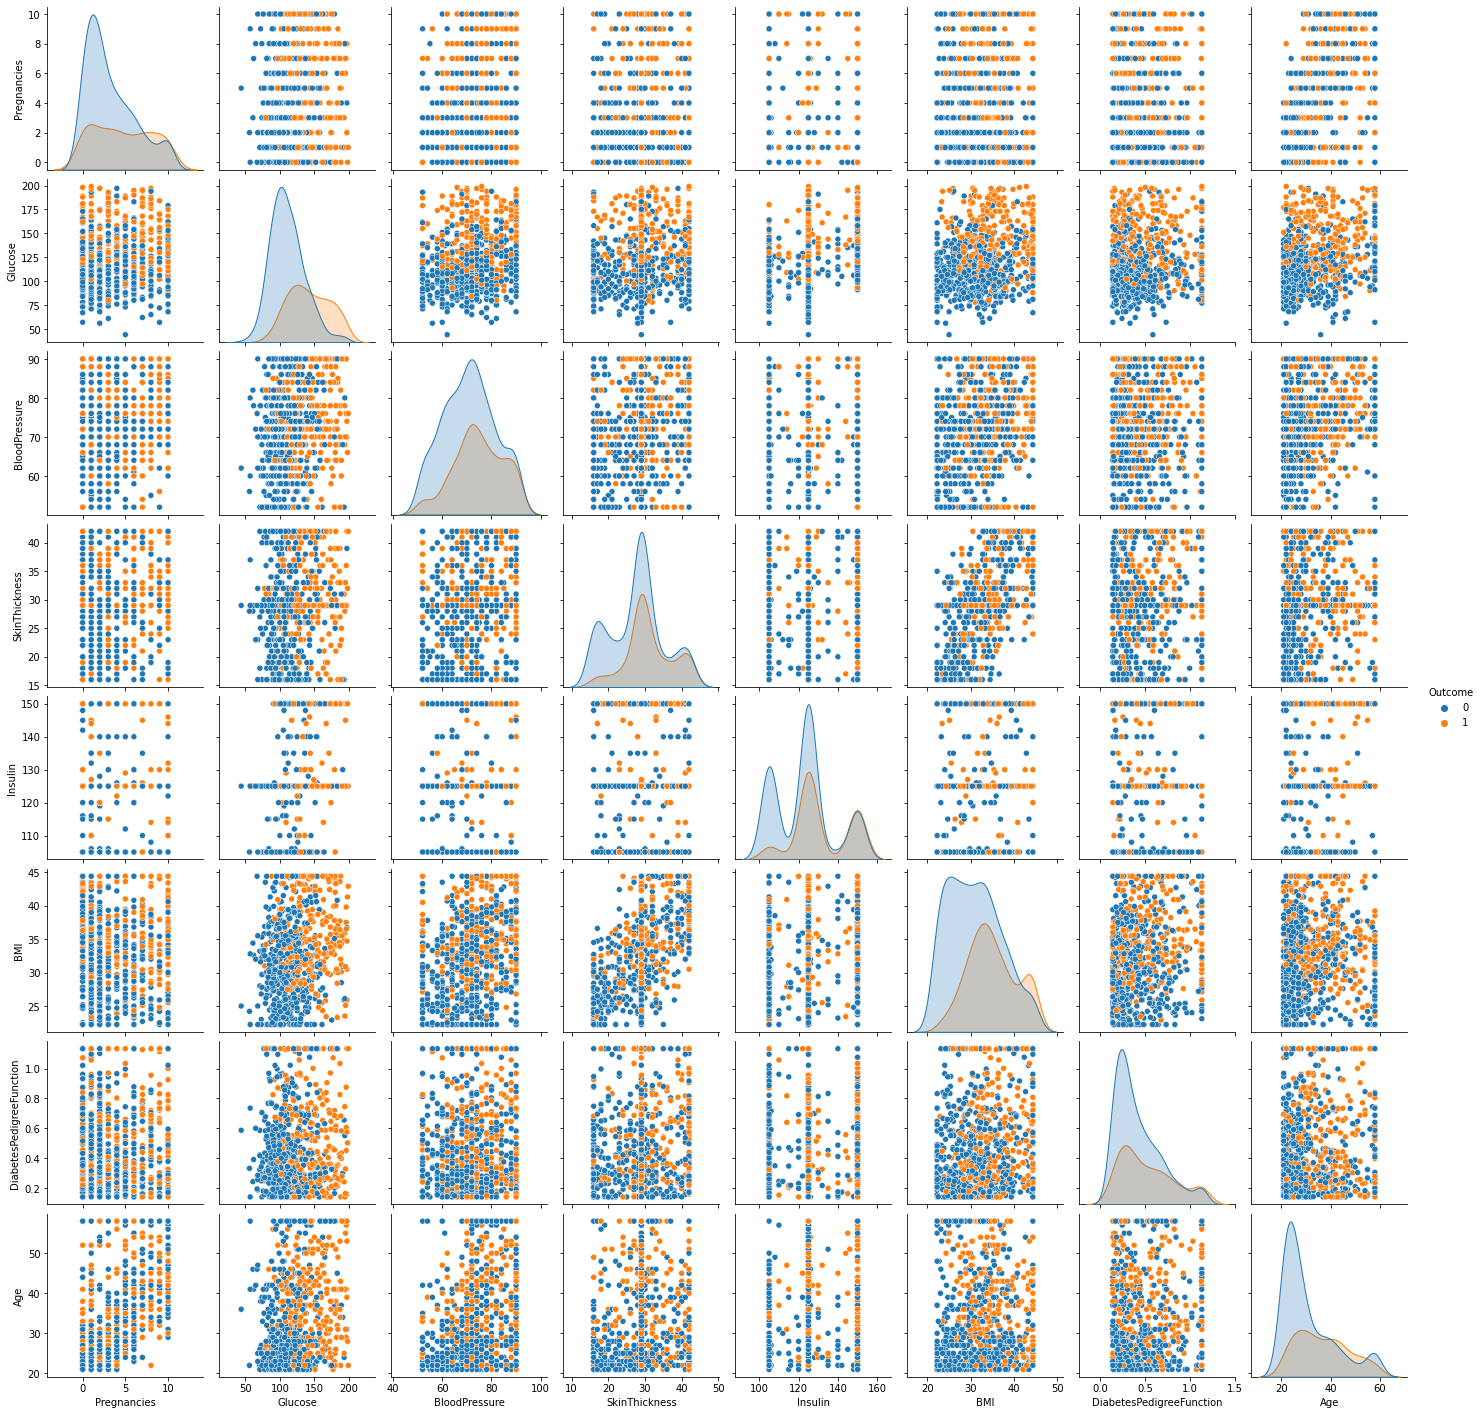

In [62]:
sns.pairplot(data, hue="Outcome", diag_kind="kde")

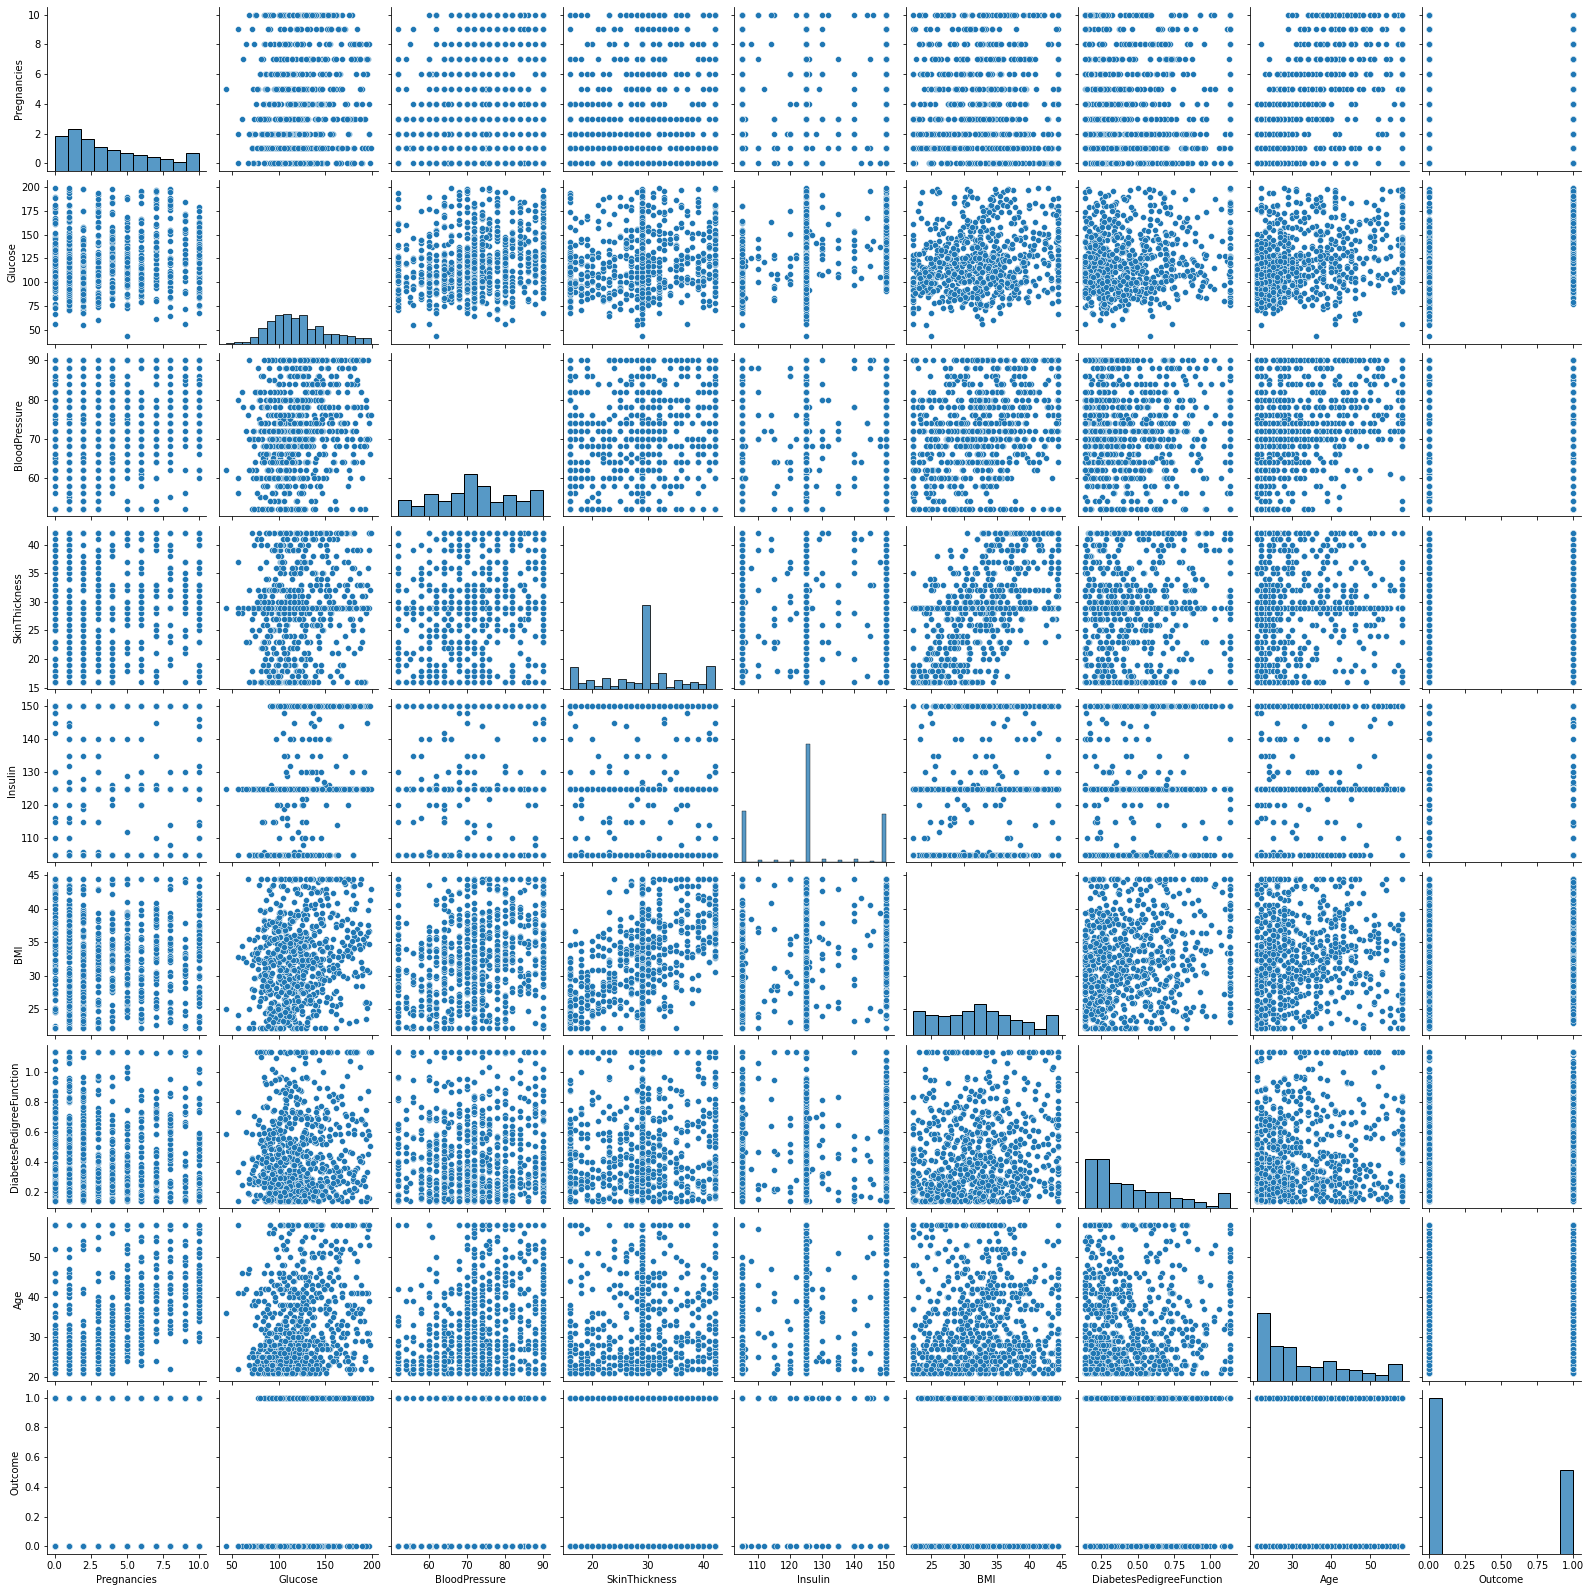

In [64]:
sns.pairplot(data)

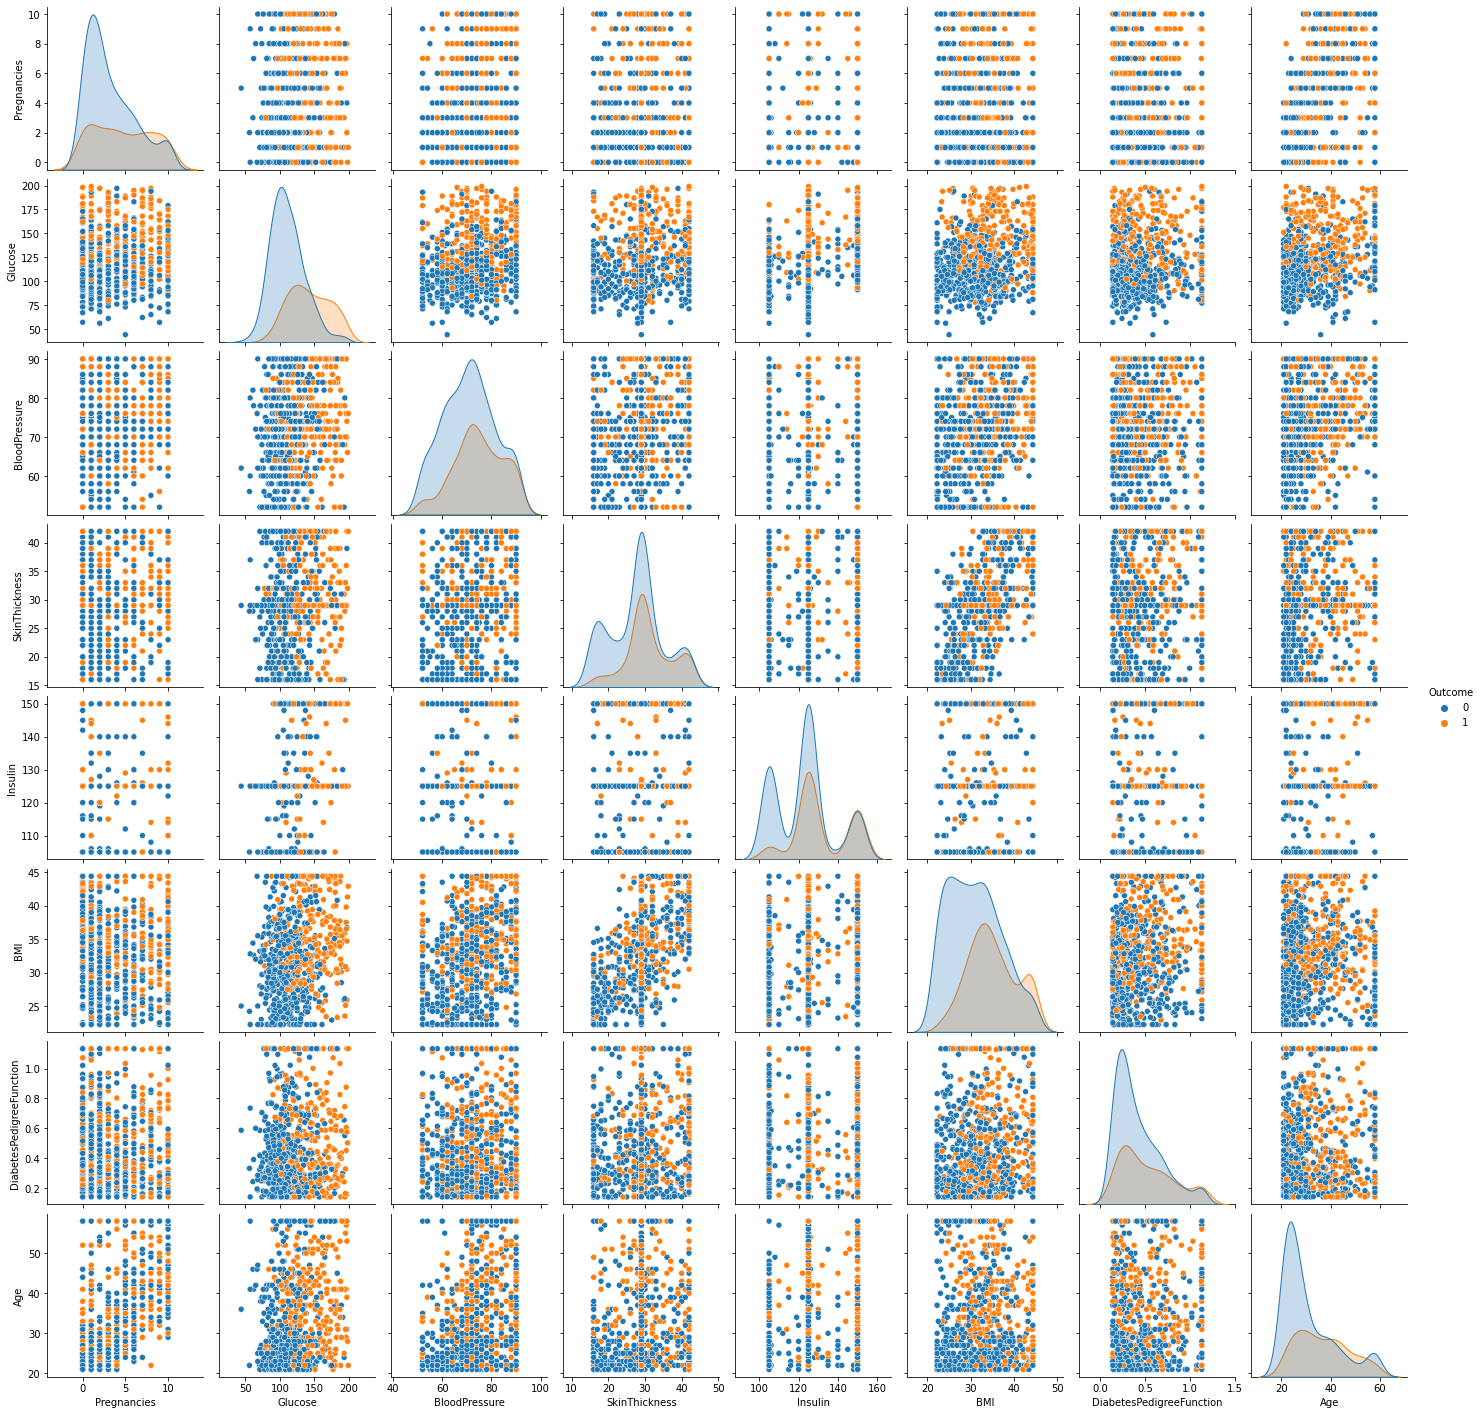

In [65]:
sns.pairplot(data, hue="Outcome")

The above corrplot shows presence of multi-collinearity in the dataset.

* More than 1(one) peak in "kde-plot" --- indicates -- presence of clusters.